# Literature Review Survey Processing

In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Part 1. Importing the Survey Data

In [4]:
survey_df = pd.read_csv("./data/Copy of Literature Review (Responses) - Form Responses 1.csv")

In [5]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Age (check all that apply),Social Agent Sex,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,Swiss,...,juvenile (3-7 weeks or week not specified),same sex as subject,group-housed,Does not specify,WT (wild type),no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN
1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,C57BL/6J (control strain) and BTBR,...,does not specify,same sex as subject,does not specify,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN
2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specifiy,does not specify,Does not specify,WT (wild type),yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...
3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,does not specify,Does not specifiy,does not specify,Does not specify,WT (wild type),yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN
4,3/30/2022 19:59:15,Repeated isoflurane in adult male mice leads t...,"Bajwa, Nikita",2019-02,Amelia Chambers,NaN,yes,Mice,no,C57BL/6J,...,does not specify,always male,does not specify,Does not specify,WT (wild type),yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN


# Part 2: Processing Data

## Adding information of the years

- Converting the Dates to Years so that we can get per year information

In [6]:
survey_df["publication_year"] = survey_df["Publication Date (YYYY-MM)"].apply(lambda x: int(x.split("-")[0]))

- Getting the total number of papers per year

In [7]:
year_to_number_of_papers_df = survey_df.groupby(["publication_year"]).size()

In [8]:
year_to_number_of_papers_df

publication_year
2000     5
2001     9
2002     9
2003     9
2004     9
2005    17
2006    12
2007    23
2008    26
2009    29
2010     4
2011    31
2012    26
2013    33
2014    43
2015    44
2016    43
2017    36
2018    47
2019    57
2020    51
2021    82
2022     7
dtype: int64

- Creating a dictionary so that we can get the number of papers for a given year

In [9]:
year_to_number_of_paper_dict = dict(zip(year_to_number_of_papers_df.index, year_to_number_of_papers_df.values))

In [10]:
year_to_number_of_paper_dict

{2000: 5,
 2001: 9,
 2002: 9,
 2003: 9,
 2004: 9,
 2005: 17,
 2006: 12,
 2007: 23,
 2008: 26,
 2009: 29,
 2010: 4,
 2011: 31,
 2012: 26,
 2013: 33,
 2014: 43,
 2015: 44,
 2016: 43,
 2017: 36,
 2018: 47,
 2019: 57,
 2020: 51,
 2021: 82,
 2022: 7}

## Making a column specifying if the paper uses mice or rats

- This will make filtering out papers based on species easier

In [11]:
survey_df["Species"].unique()

array(['Mice', 'Rats', 'Both'], dtype=object)

In [12]:
survey_df["mice_used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")
survey_df["rats_used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")


In [13]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,mice_used,rats_used
0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,Swiss,...,Does not specify,WT (wild type),no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2019,1,0
1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,C57BL/6J (control strain) and BTBR,...,Does not specify,WT (wild type),yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2019,1,0
2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,Does not specify,WT (wild type),yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...,2019,0,1
3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,Does not specify,WT (wild type),yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN,2019,0,1
4,3/30/2022 19:59:15,Repeated isoflurane in adult male mice leads t...,"Bajwa, Nikita",2019-02,Amelia Chambers,NaN,yes,Mice,no,C57BL/6J,...,Does not specify,WT (wild type),yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,2019,1,0


# Standarizing all the names

- We need to have all the species names that should be the same but typed differently to all have the same name

## Capitalizing all the names

- Python treats all text that have different capitalization as seperate

In [14]:
all_strains = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].unique()

In [15]:
for strain in all_strains[:25]:
    print(strain)

Swiss
C57BL/6J (control strain) and BTBR
Wistar
C57BL/6J
(Thy1-APPSweLon) 41Ema (T41)
C57BL/6JOlaHsd; C57BL/6J
PV-Cre; SOM-IRES-Cre
C57B6J 
VGluT3 KO
Sprague Dawley 
Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Sprague-Dawley
C57BL/6N
WAG/Rij; Wistar
C57-black6
CD-1
Wistar albino
NLG3 KO backcrossed with C57BL6/J
C57BL/6J; Klk8 KO
Mecp2 KO
KM670/671NL; EphA4flox/flox; Camk2aCre (AD;EphA4-KO)
Sprague Dawley
Shank3 KO
Oxtr-Cre
Sprague Dawley, tgDISC1


In [16]:
capitalized_all_strains = {strain: strain.upper().strip().encode('ascii', errors='ignore').decode("utf-8")  for strain in all_strains}

In [17]:
count = 0
for key, value in capitalized_all_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1


Original Name: Swiss
Updated Name: SWISS
Original Name: C57BL/6J (control strain) and BTBR
Updated Name: C57BL/6J (CONTROL STRAIN) AND BTBR
Original Name: Wistar
Updated Name: WISTAR
Original Name: C57BL/6J
Updated Name: C57BL/6J
Original Name: (Thy1-APPSweLon) 41Ema (T41)
Updated Name: (THY1-APPSWELON) 41EMA (T41)
Original Name: C57BL/6JOlaHsd; C57BL/6J
Updated Name: C57BL/6JOLAHSD; C57BL/6J
Original Name: PV-Cre; SOM-IRES-Cre
Updated Name: PV-CRE; SOM-IRES-CRE
Original Name: C57B6J 
Updated Name: C57B6J
Original Name: VGluT3 KO
Updated Name: VGLUT3 KO
Original Name: Sprague Dawley 
Updated Name: SPRAGUE DAWLEY
Original Name: Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Updated Name: CRYBB2O377, CRYBB2PHILLY, AND CRYBB2AEY2 BACKCROSSED WITH C57BL/6JG


## Correcting All the Incorrect Punctuation

- Replacing all `,` commas with semicolons
- Removing `-`
- Removing `/`
- Removing unnecessary words like "with", "mice", "rats"

In [18]:
capitalized_all_strains = {key: value.replace(",", ";") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("-", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("WITH", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("W/", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RATS", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("RAT", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("MICE", "") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUE DAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}
capitalized_all_strains = {key: value.replace("SPRAGUEDAWLEY", "SPRAGUE_DAWLEY") for key, value in capitalized_all_strains.items()}


In [19]:
count = 0
for key, value in capitalized_all_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: Swiss
Updated Name: SWISS
Original Name: C57BL/6J (control strain) and BTBR
Updated Name: C57BL6J (CONTROL STRAIN) AND BTBR
Original Name: Wistar
Updated Name: WISTAR
Original Name: C57BL/6J
Updated Name: C57BL6J
Original Name: (Thy1-APPSweLon) 41Ema (T41)
Updated Name: (THY1APPSWELON) 41EMA (T41)
Original Name: C57BL/6JOlaHsd; C57BL/6J
Updated Name: C57BL6JOLAHSD; C57BL6J
Original Name: PV-Cre; SOM-IRES-Cre
Updated Name: PVCRE; SOMIRESCRE
Original Name: C57B6J 
Updated Name: C57B6J
Original Name: VGluT3 KO
Updated Name: VGLUT3 KO
Original Name: Sprague Dawley 
Updated Name: SPRAGUE_DAWLEY
Original Name: Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Updated Name: CRYBB2O377; CRYBB2PHILLY; AND CRYBB2AEY2 BACKCROSSED  C57BL6JG


## Seperating All the Strains that Belong to Each Individual Subject

- All the different subjects should have a semicolon `;` seperating them.
    - So we will use this to identify multiple subjects

In [20]:
seperated_all_strains = {key: value.split(";") for key, value in capitalized_all_strains.items()}

In [21]:
count = 0
for key, value in seperated_all_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: Swiss
Updated Name: ['SWISS']
Original Name: C57BL/6J (control strain) and BTBR
Updated Name: ['C57BL6J (CONTROL STRAIN) AND BTBR']
Original Name: Wistar
Updated Name: ['WISTAR']
Original Name: C57BL/6J
Updated Name: ['C57BL6J']
Original Name: (Thy1-APPSweLon) 41Ema (T41)
Updated Name: ['(THY1APPSWELON) 41EMA (T41)']
Original Name: C57BL/6JOlaHsd; C57BL/6J
Updated Name: ['C57BL6JOLAHSD', ' C57BL6J']
Original Name: PV-Cre; SOM-IRES-Cre
Updated Name: ['PVCRE', ' SOMIRESCRE']
Original Name: C57B6J 
Updated Name: ['C57B6J']
Original Name: VGluT3 KO
Updated Name: ['VGLUT3 KO']
Original Name: Sprague Dawley 
Updated Name: ['SPRAGUE_DAWLEY']
Original Name: Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Updated Name: ['CRYBB2O377', ' CRYBB2PHILLY', ' AND CRYBB2AEY2 BACKCROSSED  C57BL6JG']


## Seperating all the strains that are in a mixed subject

- All the mixed mice should have the word "MIXED" in them so we will use that to identify the different strains
    - As well as `X |MIXED|BACKCROSSED|AND|&`

In [22]:
# Listing out all strains in a paper regardless of it was mixed or not
listing_all_strains = {}
# Seperating all the strains that were not in the same subject
# But specifying that they are mixed with "MIXED" in between the strain names
subject_seperated_strains = {}

for key, value in seperated_all_strains.items():
    
    all_strains_for_paper = []
    all_subjects_for_paper = []
    
    for mixed_strain in value:
        # Removing all the spaces with underscores
        # Getting all the strains, splitting if there is 'X |MIXED|BACKCROSSED|AND|&'
        # Removing all empty strain names
        all_strains = [strain.strip().replace("  ", "_").replace(" ", "_") for strain in re.split(" X |MIXED|BACKCROSSED|AND|&", mixed_strain) if len(strain) >= 2]   
        # Combining the lists to make a list of all the strains
        all_strains_for_paper.extend(all_strains)
        # Making all the mixed strains into one. Then adding all the mixed strains into the list 
        all_subjects_for_paper.append(" MIXED ".join(sorted(all_strains)))
        
    listing_all_strains[key] = all_strains_for_paper
    subject_seperated_strains[key] = all_subjects_for_paper

- All the strains regardless of if the subject was mixed or not

In [23]:
count = 0
for key, value in listing_all_strains.items():
    if count <= 25:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: Swiss
Updated Name: ['SWISS']
Original Name: C57BL/6J (control strain) and BTBR
Updated Name: ['C57BL6J_(CONTROL_STRAIN)', 'BTBR']
Original Name: Wistar
Updated Name: ['WISTAR']
Original Name: C57BL/6J
Updated Name: ['C57BL6J']
Original Name: (Thy1-APPSweLon) 41Ema (T41)
Updated Name: ['(THY1APPSWELON)_41EMA_(T41)']
Original Name: C57BL/6JOlaHsd; C57BL/6J
Updated Name: ['C57BL6JOLAHSD', 'C57BL6J']
Original Name: PV-Cre; SOM-IRES-Cre
Updated Name: ['PVCRE', 'SOMIRESCRE']
Original Name: C57B6J 
Updated Name: ['C57B6J']
Original Name: VGluT3 KO
Updated Name: ['VGLUT3_KO']
Original Name: Sprague Dawley 
Updated Name: ['SPRAGUE_DAWLEY']
Original Name: Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Updated Name: ['CRYBB2O377', 'CRYBB2PHILLY', 'CRYBB2AEY2', 'C57BL6JG']
Original Name: Sprague-Dawley
Updated Name: ['SPRAGUE_DAWLEY']
Original Name: C57BL/6N
Updated Name: ['C57BL6N']
Original Name: WAG/Rij; Wistar
Updated Name: ['WAGRIJ', 'WISTAR']
Original Nam

- All the strains seperated into the strain groups for each mixed subject

In [24]:
count = 0
for key, value in subject_seperated_strains.items():
    if count <= 10:
        print("Original Name: {}".format(key))
        print("Updated Name: {}".format(value))

    else:
        break
    count += 1

Original Name: Swiss
Updated Name: ['SWISS']
Original Name: C57BL/6J (control strain) and BTBR
Updated Name: ['BTBR MIXED C57BL6J_(CONTROL_STRAIN)']
Original Name: Wistar
Updated Name: ['WISTAR']
Original Name: C57BL/6J
Updated Name: ['C57BL6J']
Original Name: (Thy1-APPSweLon) 41Ema (T41)
Updated Name: ['(THY1APPSWELON)_41EMA_(T41)']
Original Name: C57BL/6JOlaHsd; C57BL/6J
Updated Name: ['C57BL6JOLAHSD', 'C57BL6J']
Original Name: PV-Cre; SOM-IRES-Cre
Updated Name: ['PVCRE', 'SOMIRESCRE']
Original Name: C57B6J 
Updated Name: ['C57B6J']
Original Name: VGluT3 KO
Updated Name: ['VGLUT3_KO']
Original Name: Sprague Dawley 
Updated Name: ['SPRAGUE_DAWLEY']
Original Name: Crybb2O377, Crybb2Philly, and Crybb2Aey2 backcrossed with C57BL/6JG
Updated Name: ['CRYBB2O377', 'CRYBB2PHILLY', 'C57BL6JG MIXED CRYBB2AEY2']


- Adding new columns of the processed strain names

In [25]:
survey_df["all_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(listing_all_strains)
survey_df["per_subject_processed_strains"] = survey_df["Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black"].map(subject_seperated_strains)

In [26]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,mice_used,rats_used,all_processed_strains,per_subject_processed_strains
0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,Swiss,...,no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2019,1,0,[SWISS],[SWISS]
1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,C57BL/6J (control strain) and BTBR,...,yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2019,1,0,"[C57BL6J_(CONTROL_STRAIN), BTBR]",[BTBR MIXED C57BL6J_(CONTROL_STRAIN)]
2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...,2019,0,1,[WISTAR],[WISTAR]
3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN,2019,0,1,[WISTAR],[WISTAR]
4,3/30/2022 19:59:15,Repeated isoflurane in adult male mice leads t...,"Bajwa, Nikita",2019-02,Amelia Chambers,NaN,yes,Mice,no,C57BL/6J,...,yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,2019,1,0,[C57BL6J],[C57BL6J]


In [27]:
survey_df.to_csv("./proc/spread_sheets/literature_review_processed_strains.csv")

- Counting the number of papers that have each strain
    - For the dataframe with all the strains in a paper regardless of if it's a mixed subject or not

In [28]:
all_listed_strain_counts_df = pd.Series(Counter(chain(*survey_df["all_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [29]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
42,C57BL6J,154
128,WISTAR,142
119,SPRAGUE_DAWLEY,79
39,C57BL6,76
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,8


- Counting the number of papers that have each strain
    - For the dataframe with all the strains in a paper regardless of if it's a mixed subject or not

In [30]:
per_subject_strain_counts_df = pd.Series(Counter(chain(*survey_df["per_subject_processed_strains"]))).sort_index().rename_axis('Strain').reset_index(name='Counts')

In [31]:
per_subject_strain_counts_df.sort_values("Counts", ascending=False).head(n=25)

,Strain,Counts
142,WISTAR,141
63,C57BL6J,134
135,SPRAGUE_DAWLEY,79
60,C57BL6,68
86,CD1,29
77,C57BL6N,20
136,SWISS,19
115,LONGEVANS,8
94,DOES_NOT_SPECIFY,8
121,NOT_SPECIFIED,7


- Checking why different amounts of "C57BL6J"
    - So there is less in `per_subject_strain_counts_df` because some of the "C57BL6J" are in a mixed group. But if you look at the total, it's all the same

In [32]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
42,C57BL6J,154
48,C57BL6JOLAHSD,6
44,C57BL6JC57BL6N129S6,2
49,C57BL6JRJ,2
4,129C57BL6J,1


In [33]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")].sort_values("Counts", ascending=False).head()

,Strain,Counts
63,C57BL6J,134
73,C57BL6JOLAHSD,6
55,C3HHEJ MIXED C57BL6J,4
64,C57BL6J MIXED C57BL6N,2
69,C57BL6JC57BL6N129S6,2


In [34]:
all_listed_strain_counts_df[all_listed_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

176

In [35]:
per_subject_strain_counts_df[per_subject_strain_counts_df["Strain"].str.contains("C57BL6J")]["Counts"].sum()

176

# Changing the formatting of the dataframe to seperate each individual strain by row

- Creating a row for each strain in a paper

In [36]:
all_processed_strains_df = survey_df.explode("all_processed_strains").reset_index()
per_subject_processed_strains_df = survey_df.explode("per_subject_processed_strains").reset_index()

- Seperating all the strains regardless of it's in a mixed subject or not

In [37]:
all_processed_strains_df["all_processed_strains"].head(n=25)

0                           SWISS
1        C57BL6J_(CONTROL_STRAIN)
2                            BTBR
3                          WISTAR
4                          WISTAR
5                         C57BL6J
6     (THY1APPSWELON)_41EMA_(T41)
7                           SWISS
8                   C57BL6JOLAHSD
9                         C57BL6J
10                          PVCRE
11                     SOMIRESCRE
12                         C57B6J
13                      VGLUT3_KO
14                          SWISS
15                 SPRAGUE_DAWLEY
16                     CRYBB2O377
17                   CRYBB2PHILLY
18                     CRYBB2AEY2
19                       C57BL6JG
20                 SPRAGUE_DAWLEY
21                        C57BL6N
22                         WISTAR
23                         WAGRIJ
24                         WISTAR
Name: all_processed_strains, dtype: object

- Keeing the strains that are in the same mixed subject together

In [38]:
per_subject_processed_strains_df["per_subject_processed_strains"].head(n=25)

0                                   SWISS
1     BTBR MIXED C57BL6J_(CONTROL_STRAIN)
2                                  WISTAR
3                                  WISTAR
4                                 C57BL6J
5             (THY1APPSWELON)_41EMA_(T41)
6                                   SWISS
7                           C57BL6JOLAHSD
8                                 C57BL6J
9                                   PVCRE
10                             SOMIRESCRE
11                                 C57B6J
12                              VGLUT3_KO
13                                  SWISS
14                         SPRAGUE_DAWLEY
15                             CRYBB2O377
16                           CRYBB2PHILLY
17              C57BL6JG MIXED CRYBB2AEY2
18                         SPRAGUE_DAWLEY
19                                C57BL6N
20                                 WISTAR
21                                 WAGRIJ
22                                 WISTAR
23                              C5

In [39]:
all_processed_strains_df.to_csv("./proc/spread_sheets/literature_review_row_per_every_strain.csv")

In [40]:
per_subject_processed_strains_df.to_csv("./proc/spread_sheets/literature_review_row_per_mixed_strain.csv")

## Making a list of the most common strain counts

- Getting a list of strains with the highest counts
    - We will use this when graphing the information of the strains. This avoids graphing strains that only appear in a handful of papers.

In [41]:
all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=11)

,Strain,Counts
42,C57BL6J,154
128,WISTAR,142
119,SPRAGUE_DAWLEY,79
39,C57BL6,76
66,CD1,29
53,C57BL6N,23
120,SWISS,19
16,129SVJ,10
10,129SV,9
97,LONGEVANS,8


In [42]:
most_common_strains = list(all_listed_strain_counts_df.sort_values("Counts", ascending=False).head(n=10)["Strain"])

In [43]:
most_common_strains

['C57BL6J',
 'WISTAR',
 'SPRAGUE_DAWLEY',
 'C57BL6',
 'CD1',
 'C57BL6N',
 'SWISS',
 '129SVJ',
 '129SV',
 'LONGEVANS']

- Getting the number of papers per year that have a given strain

In [44]:
strain_year_count = all_processed_strains_df.groupby(['publication_year','all_processed_strains'], as_index=False).count()

In [45]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,per_subject_processed_strains
0,2000,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,0,2,2,2
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
2,2000,WISTAR,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,0,2,2,2
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


- Getting the proportion of papers for each year of a given strain

In [46]:
year_to_number_of_paper_dict

{2000: 5,
 2001: 9,
 2002: 9,
 2003: 9,
 2004: 9,
 2005: 17,
 2006: 12,
 2007: 23,
 2008: 26,
 2009: 29,
 2010: 4,
 2011: 31,
 2012: 26,
 2013: 33,
 2014: 43,
 2015: 44,
 2016: 43,
 2017: 36,
 2018: 47,
 2019: 57,
 2020: 51,
 2021: 82,
 2022: 7}

In [47]:
strain_year_count["proportion_of_papers"] = strain_year_count.apply(lambda x: x["index"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [48]:
strain_year_count["proportion_of_papers"]

0      0.400000
1      0.200000
2      0.400000
3      0.111111
4      0.111111
         ...   
316    0.285714
317    0.142857
318    0.142857
319    0.285714
320    0.142857
Name: proportion_of_papers, Length: 321, dtype: float64

In [49]:
strain_year_count.head()

,publication_year,all_processed_strains,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,per_subject_processed_strains,proportion_of_papers
0,2000,C57BL6J,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,0.400000
1,2000,SPRAGUE_DAWLEY,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0.200000
2,2000,WISTAR,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,0.400000
3,2001,129SVEV,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0.111111
4,2001,C57BL6J,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0.111111


- Plotting the proportion against the years

In [50]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

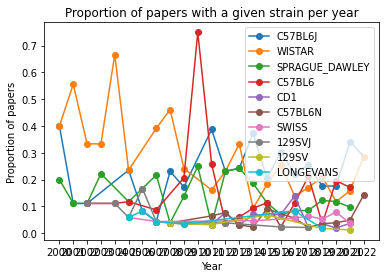

In [51]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]   

    ax.plot(strain_df["publication_year"], strain_df["proportion_of_papers"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

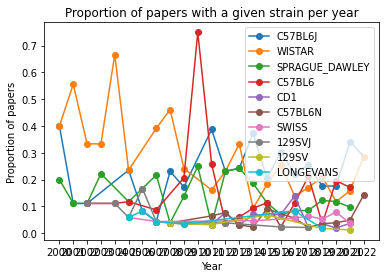

In [52]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]   

    ax.plot(strain_df["publication_year"], strain_df["proportion_of_papers"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

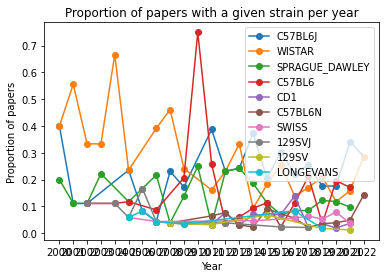

In [53]:
fig, ax = plt.subplots()

for strain in most_common_strains:
    strain_df = strain_year_count[strain_year_count["all_processed_strains"] == strain]   

    ax.plot(strain_df["publication_year"], strain_df["proportion_of_papers"], '-o', label=strain)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proportion of papers with a given strain per year")
plt.xlabel("Year")
plt.ylabel("Proportion of papers")
plt.savefig("./proc/plots/year_vs_strain.png")

## Trends in Sex of the Subject

In [54]:
survey_df["Subject Sex"]

0           Male
1      Uses both
2      Uses both
3      Uses both
4           Male
         ...    
647         Male
648         Male
649         Male
650         Male
651         Male
Name: Subject Sex, Length: 652, dtype: object

In [55]:
survey_df

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",publication_year,mice_used,rats_used,all_processed_strains,per_subject_processed_strains
0,3/23/2022 15:05:10,Social isolation impairs the persistence of so...,"Almeida-Santos, Ana",2019-01,Amelia Chambers,NaN,yes,Mice,no,Swiss,...,no,No,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2019,1,0,[SWISS],[SWISS]
1,3/23/2022 15:22:15,Differences in the expression of restricted re...,"Amodeo, Dionsio",2019-06,Amelia Chambers,NaN,yes,Mice,yes,C57BL/6J (control strain) and BTBR,...,yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2019,1,0,"[C57BL6J_(CONTROL_STRAIN), BTBR]",[BTBR MIXED C57BL6J_(CONTROL_STRAIN)]
2,3/23/2022 15:37:45,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,yes,Yes,"Type (WT vs transgenic), None","Yes, this one was tricky.",No information about stranger rat that I could...,2019,0,1,[WISTAR],[WISTAR]
3,3/30/2022 19:42:12,Sex-specific differences in adult cognition an...,"Azogu, Idu",2019-05,Amelia Chambers,NaN,yes,Rats,no,Wistar,...,yes,Yes,Strain,"No, I feel confident, and I double-checked all...",NaN,2019,0,1,[WISTAR],[WISTAR]
4,3/30/2022 19:59:15,Repeated isoflurane in adult male mice leads t...,"Bajwa, Nikita",2019-02,Amelia Chambers,NaN,yes,Mice,no,C57BL/6J,...,yes,Yes,Sex,"No, I feel confident, and I double-checked all...",NaN,2019,1,0,[C57BL6J],[C57BL6J]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,6/15/2022 13:35:52,Modulation of the storage of social recognitio...,"Cavalcante, Lorena",2017-09,Ryo Iwata,"Leo, good",yes,Rats,no,Wistar,...,yes,Yes,"Sex, Strain, Housing History, Type (WT vs tran...","No, I feel confident, and I double-checked all...",NaN,2017,0,1,[WISTAR],[WISTAR]
648,6/15/2022 14:05:16,Mice with genetic deletion of the heparin-bind...,"Prediger, Rui",2011-02,Ryo Iwata,NaN,yes,Mice,no,C57BL/6,...,no,No,"Strain, Housing History","No, I feel confident, and I double-checked all...",NaN,2011,1,0,[C57BL6],[C57BL6]
649,6/15/2022 14:58:37,Sex-Specific Cognitive Deficits and Regional B...,"Lan, Wen-Chun",2011-07,Ryo Iwata,NaN,yes,Mice,no,C57BL/6,...,no,Yes,"Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2011,1,0,[C57BL6],[C57BL6]
650,6/15/2022 15:06:24,Differential Immediate and Sustained Memory En...,"Thomsen, Morten",2011-11,Ryo Iwata,NaN,yes,Rats,no,Wistar,...,yes,Yes,"Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",NaN,2011,0,1,[WISTAR],[WISTAR]


In [56]:
sex_year_count = survey_df.groupby(['publication_year','Subject Sex'], as_index=False).size()

In [57]:
sex_year_count.head()

,publication_year,Subject Sex,size
0,2000,Male,5
1,2001,Female,1
2,2001,Male,8
3,2002,Male,9
4,2003,Female,2


In [58]:
year_to_number_of_paper_dict

{2000: 5,
 2001: 9,
 2002: 9,
 2003: 9,
 2004: 9,
 2005: 17,
 2006: 12,
 2007: 23,
 2008: 26,
 2009: 29,
 2010: 4,
 2011: 31,
 2012: 26,
 2013: 33,
 2014: 43,
 2015: 44,
 2016: 43,
 2017: 36,
 2018: 47,
 2019: 57,
 2020: 51,
 2021: 82,
 2022: 7}

In [59]:
sex_year_count["proportion_of_papers"] = sex_year_count.apply(lambda x: x["size"] / year_to_number_of_paper_dict[x["publication_year"]], axis=1) 

In [60]:
sex_year_count

,publication_year,Subject Sex,size,proportion_of_papers
0,2000,Male,5,1.000000
1,2001,Female,1,0.111111
2,2001,Male,8,0.888889
3,2002,Male,9,1.000000
4,2003,Female,2,0.222222
...,...,...,...,...
69,2021,Male,48,0.585366
70,2021,Uses both,28,0.341463
71,2022,Female,2,0.285714
72,2022,Male,3,0.428571


In [61]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

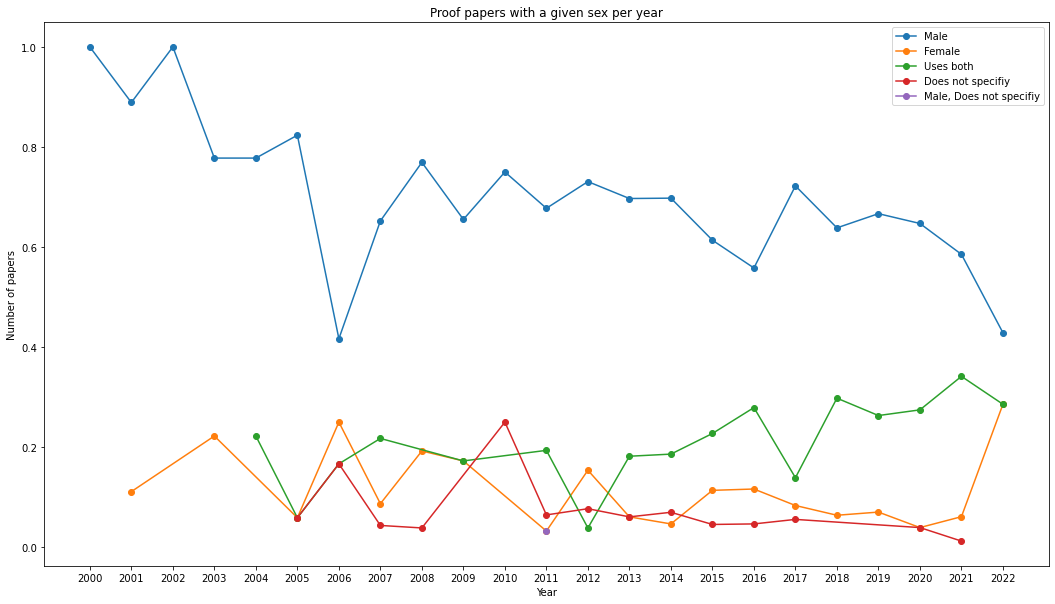

In [62]:
fig, ax = plt.subplots()

for sex in sex_year_count["Subject Sex"].unique():
    sex_df = sex_year_count[sex_year_count["Subject Sex"] == sex]
    ax.plot(sex_df["publication_year"], sex_df["proportion_of_papers"], '-o', label=sex)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Proof papers with a given sex per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_sex.png")

## Trends in Type of the Subject

In [63]:
survey_df["Subject Type"]

0      WT (wild type)
1      WT (wild type)
2      WT (wild type)
3      WT (wild type)
4      WT (wild type)
            ...      
647    WT (wild type)
648              both
649    WT (wild type)
650    WT (wild type)
651              both
Name: Subject Type, Length: 652, dtype: object

In [64]:
type_year_count = per_subject_processed_strains_df.groupby(['publication_year','Subject Type'], as_index=False).count()

In [65]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

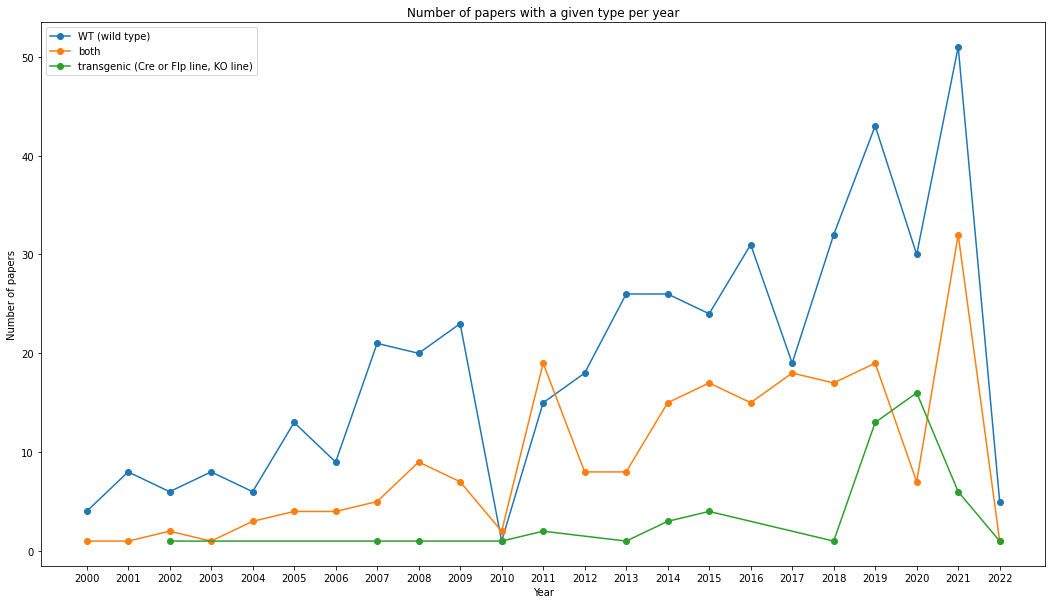

In [66]:
fig, ax = plt.subplots()

for subject_type in type_year_count["Subject Type"].unique():
    type_df = type_year_count[type_year_count["Subject Type"] == subject_type]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=subject_type)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given type per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_type.png")

## Trends in Age of the Subject

# TODO: Remove commas from texts

In [67]:
survey_df["Subject Age"]

0      infant (0-21 days), juvenile (3-7 weeks, or we...
1                               young adult (8-12 weeks)
2                               young adult (8-12 weeks)
3      juvenile (3-7 weeks, or week not specified), y...
4                                    adult (12-24 weeks)
                             ...                        
647                                  adult (12-24 weeks)
648                             young adult (8-12 weeks)
649                             young adult (8-12 weeks)
650                           adult (week not specified)
651                           adult (week not specified)
Name: Subject Age, Length: 652, dtype: object

In [68]:
column_name = "Subject Age"

In [69]:
fixed_column_name = column_name + "_fixed"

In [70]:
copy_of_survey_df = survey_df.copy()

In [71]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [72]:
copy_of_survey_df[fixed_column_name]

0      [infant (0-21 days), juvenile (3-7 weeks, or w...
1                             [young adult (8-12 weeks)]
2                             [young adult (8-12 weeks)]
3      [juvenile (3-7 weeks, or week not specified), ...
4                                  [adult (12-24 weeks)]
                             ...                        
647                                [adult (12-24 weeks)]
648                           [young adult (8-12 weeks)]
649                           [young adult (8-12 weeks)]
650                         [adult (week not specified)]
651                         [adult (week not specified)]
Name: Subject Age_fixed, Length: 652, dtype: object

In [73]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [74]:
exploded_column_df[fixed_column_name]

0              infant (0-21 days)
1             juvenile (3-7 weeks
2          or week not specified)
3        young adult (8-12 weeks)
4        young adult (8-12 weeks)
                  ...            
866           adult (12-24 weeks)
867      young adult (8-12 weeks)
868      young adult (8-12 weeks)
869    adult (week not specified)
870    adult (week not specified)
Name: Subject Age_fixed, Length: 871, dtype: object

In [75]:
exploded_column_df[exploded_column_df["Species"] == "Mice"][fixed_column_name]

0              infant (0-21 days)
1             juvenile (3-7 weeks
2          or week not specified)
3        young adult (8-12 weeks)
4        young adult (8-12 weeks)
                  ...            
864      young adult (8-12 weeks)
865      young adult (8-12 weeks)
867      young adult (8-12 weeks)
868      young adult (8-12 weeks)
870    adult (week not specified)
Name: Subject Age_fixed, Length: 538, dtype: object

In [76]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [77]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

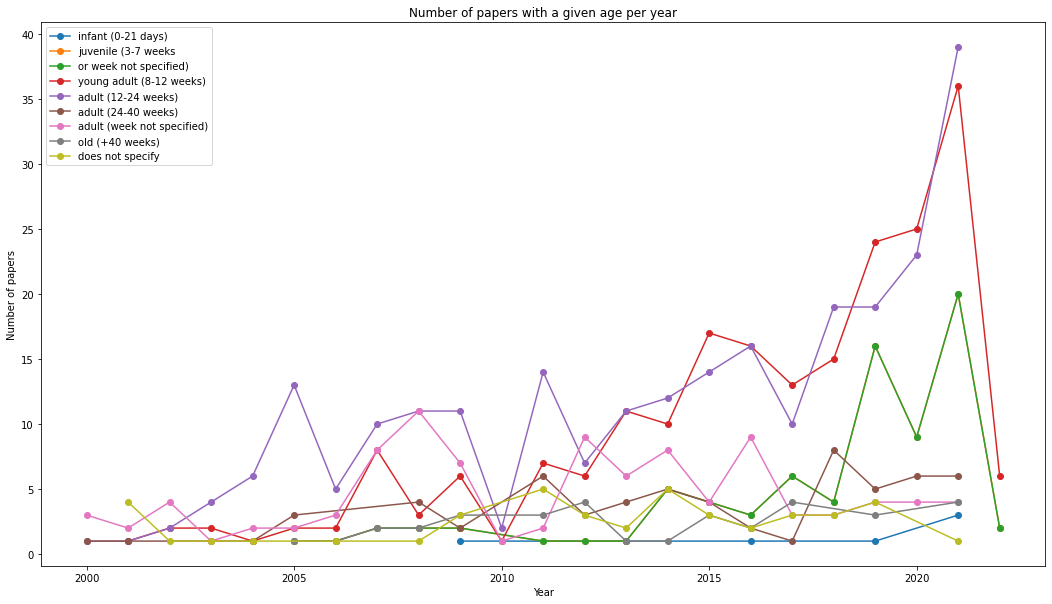

In [78]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given age per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_age.png")

## Trends in Housing of the Subject

In [79]:
survey_df["Subject Housing"]

0                            group-housed, singly-housed
1                                           group-housed
2                                           group-housed
3                                           group-housed
4                                          singly-housed
                             ...                        
647                                         group-housed
648                                         group-housed
649    singly-housed for less than a week before expe...
650                                     does not specify
651                                         group-housed
Name: Subject Housing, Length: 652, dtype: object

In [80]:
column_name = "Subject Housing"

In [81]:
fixed_column_name = column_name + "_fixed"

In [82]:
copy_of_survey_df = survey_df.copy()

In [83]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [84]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [85]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [86]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

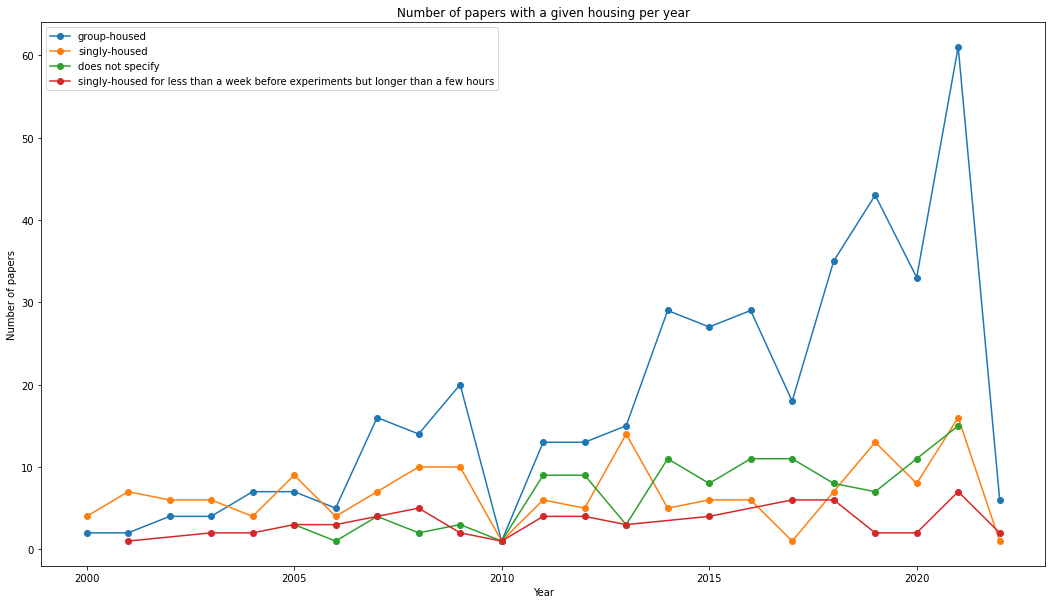

In [87]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given housing per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_housing.png")


## Trends in Age of the Subject

In [88]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "].unique()

array(['5 min exposure or less',
       '+5 min - hours of facetime and/or multiple exposure periods',
       '5 min exposure or less, littermate',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods',
       'not specified',
       '+5 min - hours of facetime and/or multiple exposure periods, littermate',
       '5 min exposure or less, +5 min - hours of facetime and/or multiple exposure periods, littermate',
       'Unspecified',
       'Happens over multiple days but time each day unspecified',
       'multiple exposure periods (+5 min - hours of facetime)',
       'Does not specify',
       '+5 min - hours of facetime and/or multiple exposure periods, cage mate of less than a week',
       'littermate',
       '5 min exposure or less, multiple exposure periods (+5 min - hours of facetime)',
       'offspring ',
       'cage mate (i.e. caged together for weeks+ but not from the same litter)'],
      dtype=object)

In [89]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

0                                 5 min exposure or less
1      +5 min - hours of facetime and/or multiple exp...
2      +5 min - hours of facetime and/or multiple exp...
3      +5 min - hours of facetime and/or multiple exp...
4                                 5 min exposure or less
                             ...                        
647    +5 min - hours of facetime and/or multiple exp...
648    +5 min - hours of facetime and/or multiple exp...
649    +5 min - hours of facetime and/or multiple exp...
650                               5 min exposure or less
651                               5 min exposure or less
Name: Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) , Length: 652, dtype: object

In [90]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [91]:
fixed_column_name = column_name + "_fixed"

In [92]:
copy_of_survey_df = survey_df.copy()

In [93]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [94]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [95]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [96]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

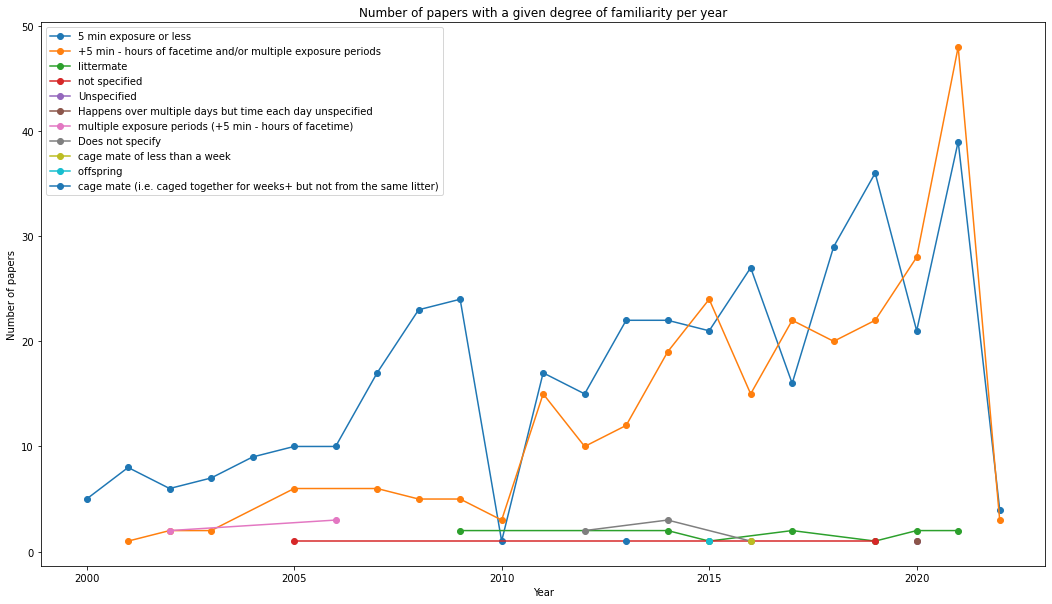

In [97]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given degree of familiarity per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_familiarity.png")

## Trends in Type of the Subject

In [98]:
survey_df["Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"]

0       no
1      yes
2      yes
3      yes
4      yes
      ... 
647    yes
648     no
649     no
650    yes
651     no
Name: Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject, Length: 652, dtype: object

In [99]:
column_name = "Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"

In [100]:
type_year_count = per_subject_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [101]:
type_year_count

,publication_year,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Rank,Social Agent Type,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,all_processed_strains,per_subject_processed_strains
0,2000,no,3,3,3,3,3,3,0,3,...,3,3,3,3,3,0,3,3,3,3
1,2000,yes,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,2
2,2001,no,6,6,6,6,6,6,1,6,...,6,6,5,6,5,0,6,6,6,6
3,2001,yes,3,3,3,3,3,3,0,3,...,3,3,3,3,3,0,3,3,3,3
4,2002,no,7,7,7,7,7,7,0,7,...,7,7,4,7,4,1,7,7,7,7
5,2002,yes,2,2,2,2,2,2,1,2,...,2,2,2,2,1,1,2,2,2,2
6,2003,no,7,7,7,7,7,7,0,7,...,7,7,7,7,7,1,7,7,7,7
7,2003,yes,2,2,2,2,2,2,0,2,...,2,2,2,2,2,0,2,2,2,2
8,2004,no,8,8,8,8,8,8,0,8,...,8,8,8,8,8,0,8,8,8,8
9,2004,yes,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1


In [102]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

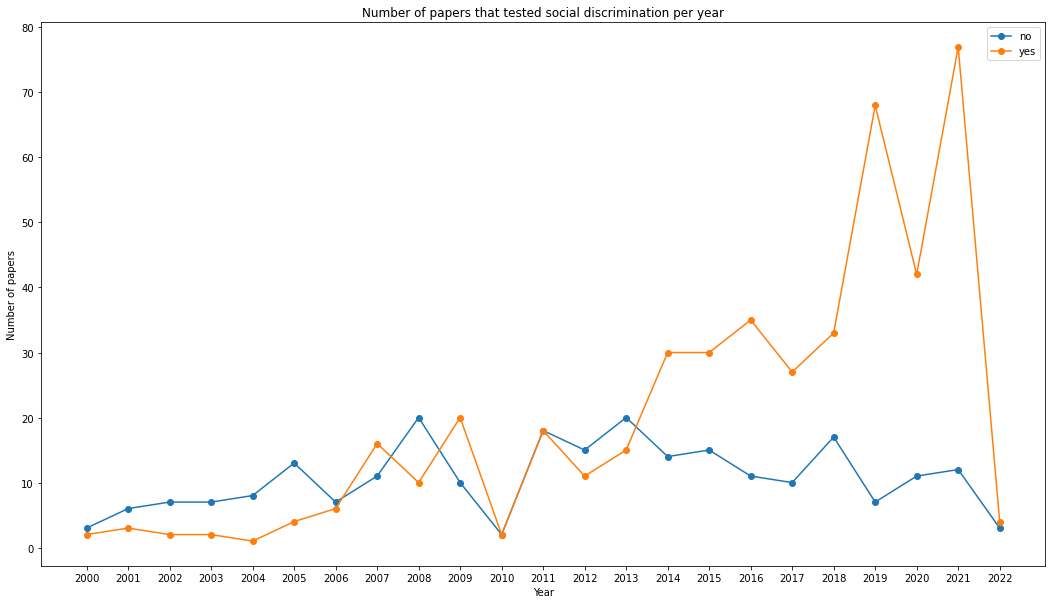

In [103]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers that tested social discrimination per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_discrimination.png")

## Trends in Type of the Subject

In [104]:
survey_df["Subject Social Rank"]

0      Does not specify
1      Does not specify
2      Does not specify
3      Does not specify
4      Does not specify
             ...       
647    Does not specify
648    Does not specify
649    Does not specify
650    Does not specify
651    Does not specify
Name: Subject Social Rank, Length: 652, dtype: object

In [105]:
column_name = "Subject Social Rank"

In [106]:
type_year_count = per_subject_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [107]:
type_year_count

,publication_year,Subject Social Rank,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",mice_used,rats_used,all_processed_strains,per_subject_processed_strains
0,2000,"Defeated, Does not specify",1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
1,2000,Does not specify,4,4,4,4,4,4,0,4,...,4,4,4,4,4,0,4,4,4,4
2,2001,Defeated,1,1,1,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
3,2001,Does not specify,8,8,8,8,8,8,1,8,...,8,8,7,8,7,0,8,8,8,8
4,2002,Does not specify,9,9,9,9,9,9,1,9,...,9,9,6,9,5,2,9,9,9,9
5,2003,Does not specify,9,9,9,9,9,9,0,9,...,9,9,9,9,9,1,9,9,9,9
6,2004,Does not specify,9,9,9,9,9,9,0,9,...,9,9,9,9,9,0,9,9,9,9
7,2005,Does not specify,17,17,17,17,17,17,0,17,...,17,17,17,17,17,1,17,17,17,17
8,2006,Does not specify,13,13,13,13,13,13,0,13,...,13,13,0,12,0,0,13,13,13,13
9,2007,Does not specify,26,26,26,26,26,26,3,26,...,26,26,26,26,26,6,26,26,26,26


In [108]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

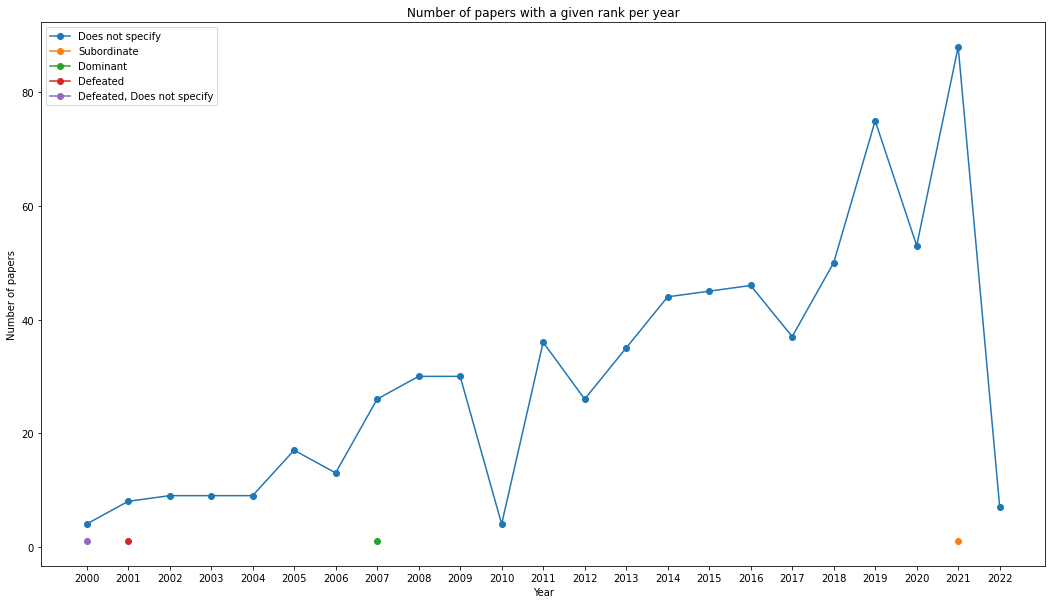

In [109]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given rank per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_rank.png")